<a href="https://colab.research.google.com/github/karinasaidene/DS_bootcamp_homework/blob/main/Neural_Network_indepth_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits
import numpy as np
from numpy import array

In [2]:
Xdigits,ydigits = load_digits(n_class=2, return_X_y=True, as_frame=False)

In [3]:
#data preparation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Xdigits, ydigits, test_size=0.1, random_state=1)

y_train =y_train.reshape((-1,1))
y_test =y_test.reshape((-1,1))

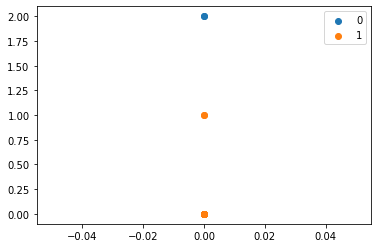

In [4]:
from matplotlib import pyplot as plt
for i in range(2):
    s=np.where(y_train.flatten()==i)
    plt.scatter(X_train[s].T[0],X_train[s].T[1],label=str(i))
    
plt.legend()
plt.show()

In [5]:
def sigmoid(x) :
    return 1/(1+np.exp(-x))

In [6]:
def forwardPass(X,Y, parameters) :
    w1,w2, b1, b2= parameters["w1"],parameters["w2"],parameters["b1"],parameters["b2"]
    z1=np.dot(X,w1.T)+b1.T
    A1=sigmoid(z1)
    z2=np.dot(A1,w2.T)+b2.T
    A2=sigmoid(z2)
    
    cache=(z1,A1,w1,b1,z2,A2,w2,b2)
    cross_entropies=-(np.multiply(Y, np.log(A2))+np.multiply((1-Y), np.log(1-A2)))
    cost= np.sum(cross_entropies)/X.shape[0]
    return cost,cache,A2

In [7]:
def backwardPass(X,Y,cache) :
    m= X.shape[0]
    (z1,A1,w1,b1,z2,A2,w2,b2)=cache
    dz2= A2-Y
    dw2=np.dot(dz2.T,A1) /m
    db2=np.sum(dz2.T, axis=1,keepdims=True)
    
    dA1=np.dot(dz2,w2)
    dz1=np.multiply(dA1, A1*(1-A1))
    dw1=np.dot(dz1.T, X)/m
    db1=np.sum(dz1.T, axis=1, keepdims=True) /m
    
    gradients={"dz2":dz2 , "dw2":dw2, "db2": db2,"dz1":dz1 , "dw1":dw1 , "db1": db1 }
    
    return gradients 
    
    

In [8]:
#weight initialization using HE initialization

def initializeParametersHe(inputSize, HiddenLayerSize,outputSize):
    w1=np.random.randn(HiddenLayerSize, inputSize) *np.sqrt(2/inputSize)
    w2=np.random.randn(outputSize, HiddenLayerSize) *np.sqrt(2/HiddenLayerSize) 
    b1=np.zeros((HiddenLayerSize,1))
    b2=np.zeros((outputSize,1))
    #we will store our parameters in a dict and return them
    parameters={"w1":w1,"w2":w2,"b1":b1,"b2":b2}
    
    return parameters

In [9]:
#we will use gradient discent to update the parameters

def GradientDescent(parameters, gradients, learningRate):
    parameters["w1"]=parameters["w1"] - learningRate * gradients["dw1"]
    parameters["w2"]=parameters["w2"] - learningRate * gradients["dw2"]
    parameters["b1"]=parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"]=parameters["b2"] - learningRate * gradients["db2"]
    
    return parameters
    

In [10]:
HiddenLayerSize=3 #number of hidden layers neurons
inputSize=X_train.shape[1] #number of input features
outputSize=y_train.shape[1] #number of output features
parameters=initializeParametersHe(inputSize, HiddenLayerSize,outputSize)

In [11]:
epoch= 10000
learningRate=0.01
losses=np.zeros((epoch,1))
for i in range(epoch) :
    losses[i, 0] ,cache, A2= forwardPass(X_train,y_train ,parameters)
    gradients = backwardPass(X_train,y_train, cache)
    parameters= GradientDescent(parameters, gradients, learningRate)

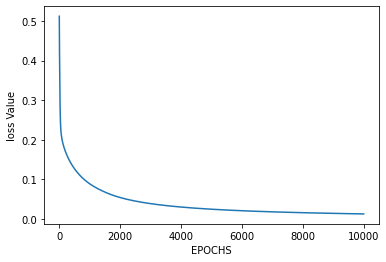

In [12]:
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("loss Value")
plt.show()

In [13]:
#Evaluate the model 
from sklearn.metrics import accuracy_score
_, _, A2= forwardPass(X_test,y_test,parameters )
y_test_classes = y_test
y_pred_classes = [1 if a>0.5 else 0 for a in A2]
print("Accuracy = ", accuracy_score(y_test_classes,y_pred_classes))

Accuracy =  1.0


In [13]:
#There's a problem in the accuracy that I couldn't fix